<a href="https://colab.research.google.com/github/Lakshya2031/Boston-House-Price-Prediction/blob/main/Boston_House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [8]:
df=pd.read_csv("/content/BostonHousing.csv")

In [3]:
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0, 0.5, 'price')

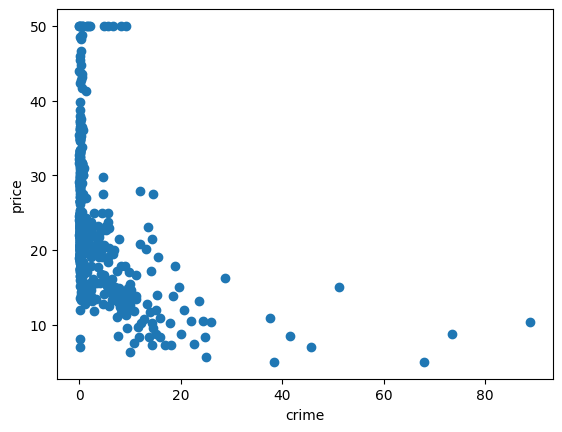

In [14]:
plt.scatter(df['crim'],df['price'])
plt.xlabel('crime')
plt.ylabel('price')

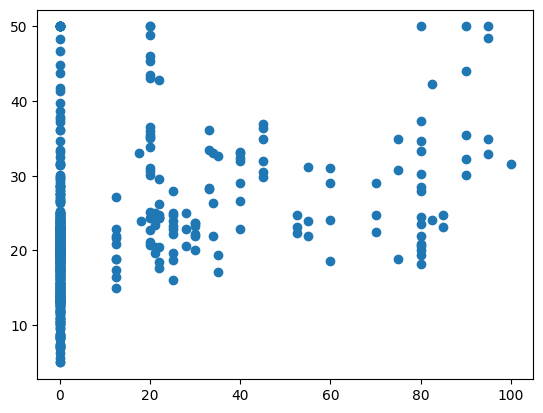

In [15]:
plt.scatter(df['zn'],df['price'])

<Axes: >

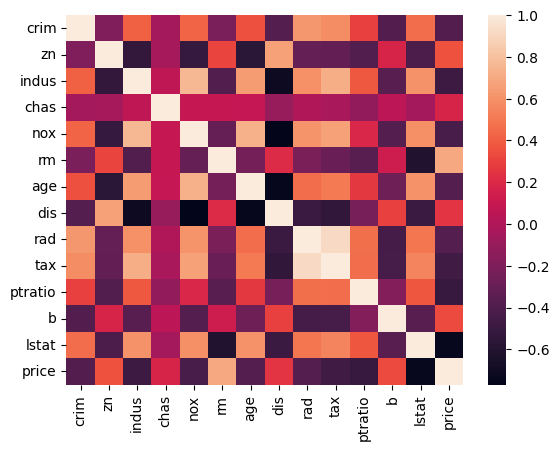

In [17]:
sns.heatmap(df.corr())

In [20]:
X=df.iloc[:,0:13]
print(X.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [24]:
Y=df['price']
print(Y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64


In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [28]:
model=XGBRegressor()

In [30]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
prediction_on_data=model.predict(X_train)
print(prediction_on_data)

[30.682726   4.9961863 35.392845  27.890469  18.397955  18.498903
 17.499163  15.612555  22.410576  20.296741  20.601768  19.79564
 28.185568  35.118656  27.46567   48.51084   27.509892  11.47396
 22.011913  13.213155   7.4054227 20.57496   20.08488   25.125267
 21.991806  19.226799  24.278309  19.394506  23.903257  34.902264
 19.40342   21.390755  26.600283  37.64759   35.992233  21.360546
 23.631617  24.7727    19.899109  20.882814  18.294334  10.880614
 43.98467   43.50456    8.303809  46.694523  32.901066  21.697348
 14.328144  29.10363   23.82753   23.137611  20.996204  20.099745
 34.707706  13.91813   13.491971  22.006905  15.211665  10.901501
 22.653748  13.812969   5.593402  29.816574  49.996925  34.893692
 20.616383  23.331997  19.1713    32.68921   19.619772  26.955513
  8.412556  45.999474  21.709673  27.06609   19.321487  19.290543
 24.80685   22.605598  31.734686  18.537033   8.696303  17.418127
 23.702051  13.297717  10.494522  12.707194  25.003622  19.698795
 14.904357  

In [38]:
accuracy_train=metrics.r2_score(Y_train,prediction_on_data)

In [39]:
print(accuracy_train)

0.999991116064606


In [41]:
prediction_on_test=model.predict(X_test)

In [44]:
accuracy_test=metrics.r2_score(Y_test,prediction_on_test)# it is a r squared error used in regression problem

In [43]:
print(accuracy_test)

0.9030388239541854


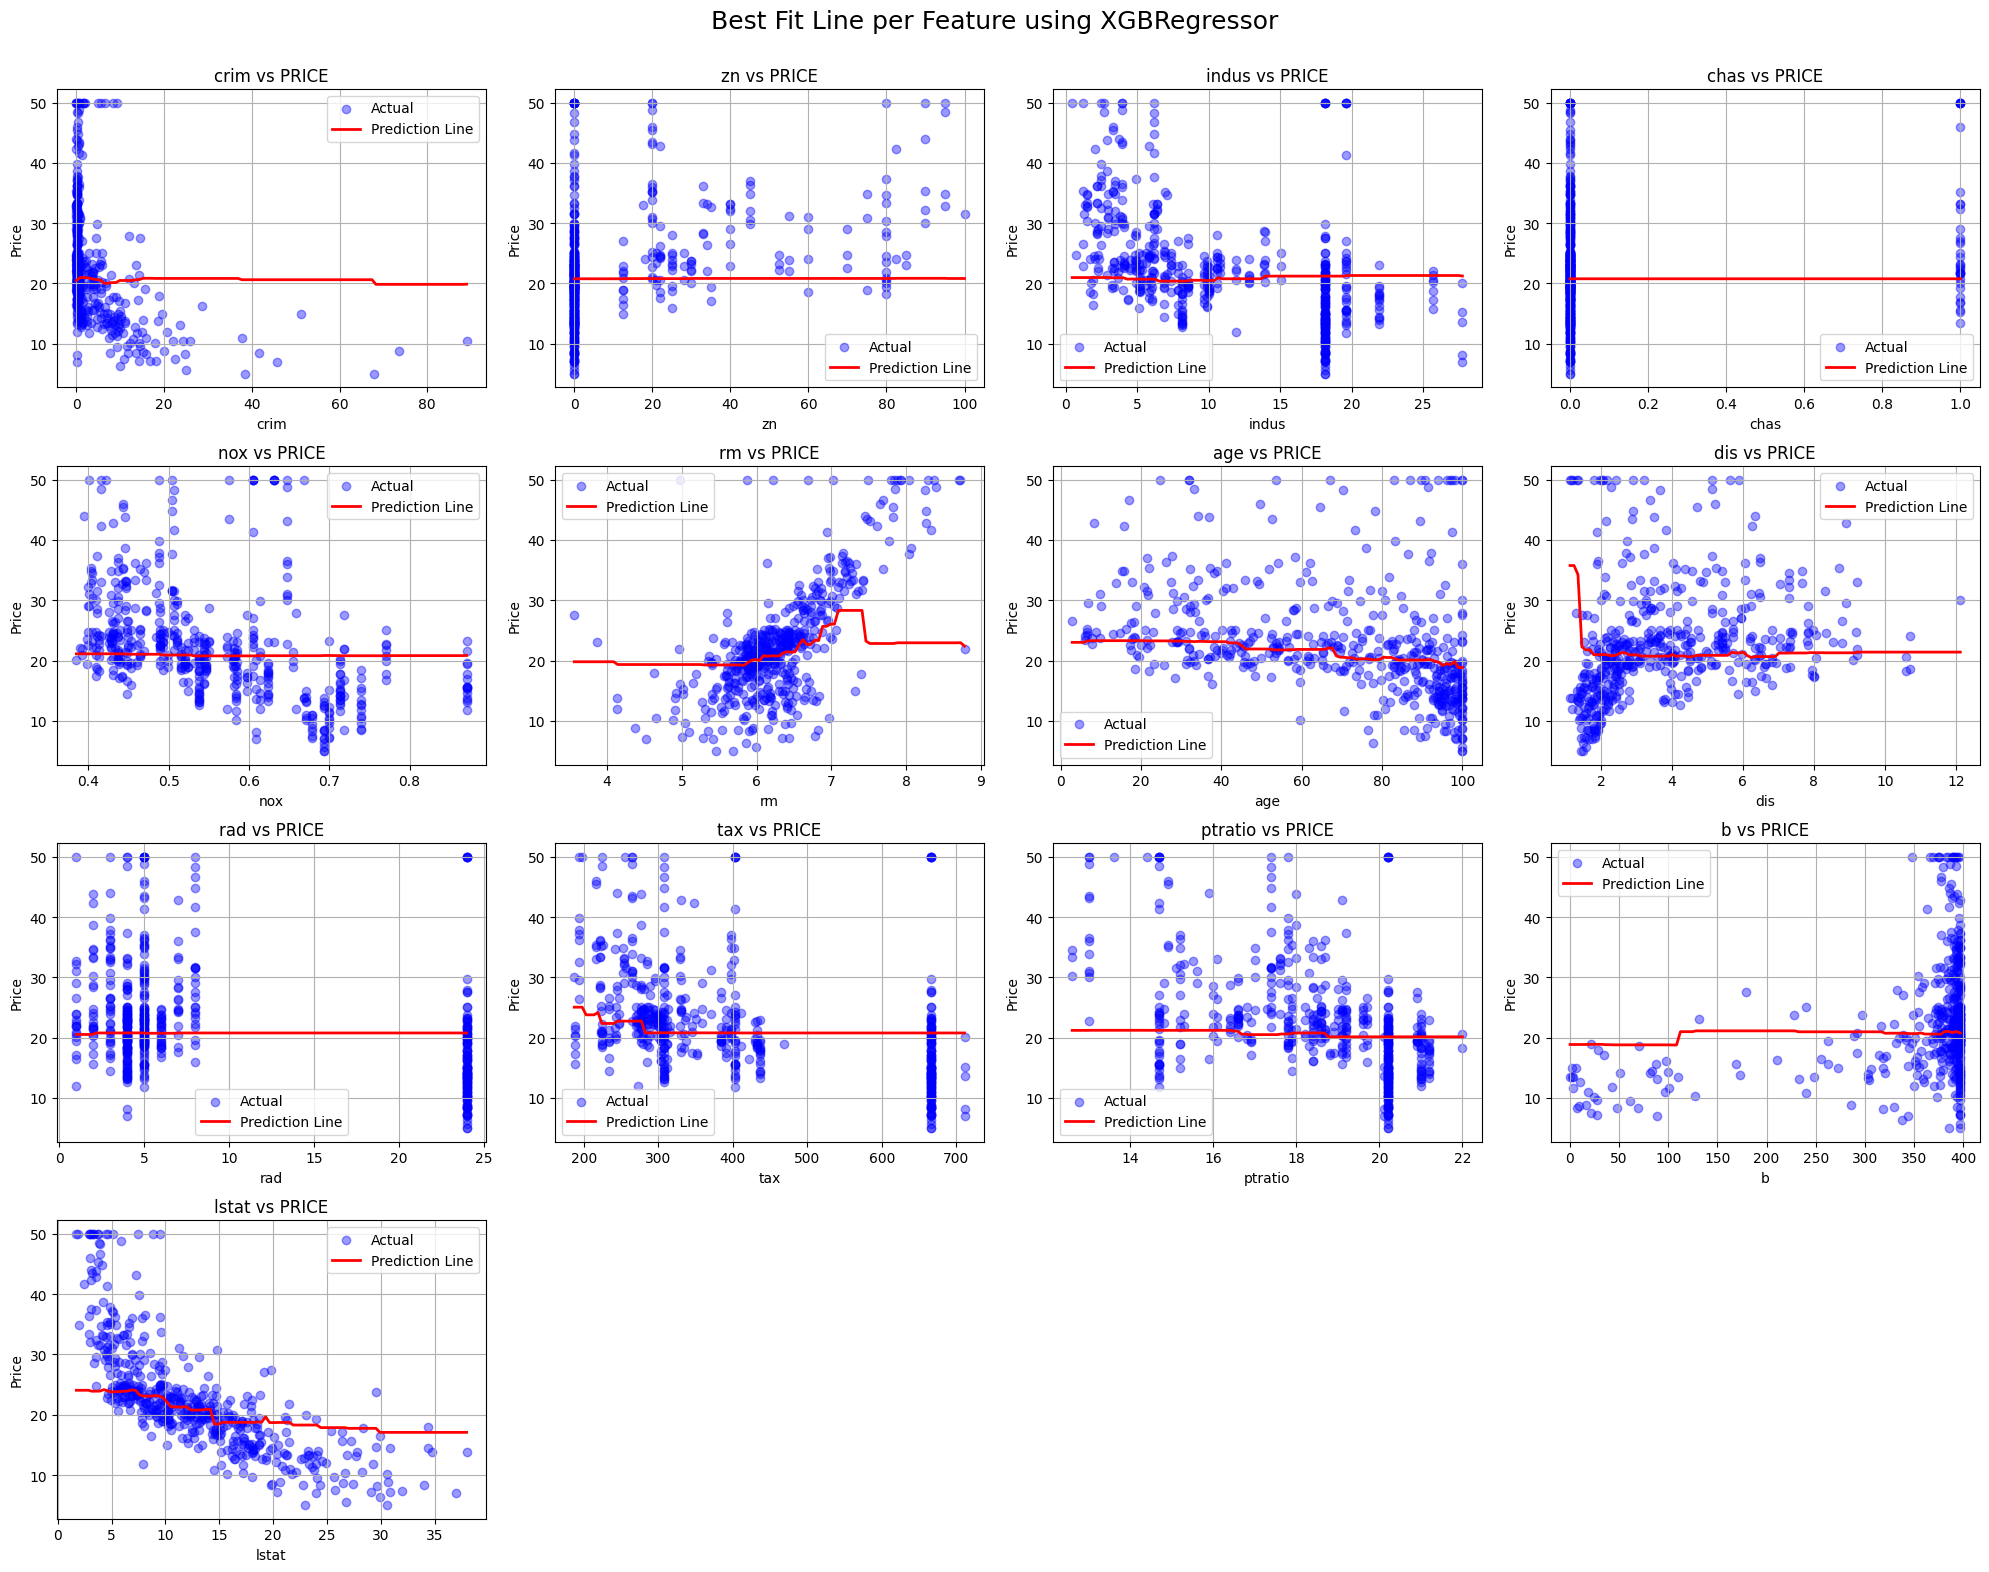

In [51]:
num_features = len(X.columns)
cols = 4  # Number of columns in the grid
rows = int(np.ceil(num_features / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    # Generate values for the feature, keep others at mean
    X_temp = pd.DataFrame([X.mean()] * 100)
    X_temp[feature] = np.linspace(X[feature].min(), X[feature].max(), 100)

    # Predict using model
    y_pred = model.predict(X_temp)

    # Plot actual vs predicted
    axes[i].scatter(X[feature], Y, alpha=0.4, color='blue', label='Actual')
    axes[i].plot(X_temp[feature], y_pred, color='red', linewidth=2, label='Prediction Line')

    axes[i].set_title(f'{feature} vs PRICE')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)

# subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Best Fit Line per Feature using XGBRegressor', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust space for the title
plt.show()